
 # Objetivo del laboratorio
 El objetivo de la presenta práctica es conocer el estándar de simulación de circuitos [SPICE](http://bwrcs.eecs.berkeley.edu/Classes/IcBook/SPICE) y realizar pequeñas simulaciones en corriente continua con el mismo. SPICE es una forma elegante y sencilla de codificar circuitos eléctricos de manera que puedan ser procesados por un ordenador. Mediante un sencillo lenguaje podemos definir resistencias, fuentes de alimentación, etc., las conexiones entre ellos y los resultados que deseamos obtener.

 ## Integrantes de la actividad
 Hemos realizado conjuntamente la actividad:
 - Francisco Javier Asensi Benito
 - Alberto Díaz Méndez
 

 # El estándar SPICE
 **SPICE** es una abreviabiación de *Simulation Program with Integrated Circtuit Emphasis*.
 Se trata básicamente de un método estándar para describir circuitos usando texto plano en
 lugar de una representación gráfica (o *esquemática*). A esta descripción en texto se
 la llama también **netlist** y básicamente se corresponde con la *lista* de los componentes del circuito y cómo estos están conectados entre sí, es decir, de los nodos de unión.
 Los ficheros netlist pueden tener extensiones `.cir`, `.net`, `.ckt`, ó `.sp` y es muy común encontrárselos con cualquiera de estas.

 Existen en el mercado muchas variantes (intérpretes) de Spice, aunque el original fue descrito
 en la Universidad de Berkeley. En la lista de intérpretes de Spice tenemos desde esfuerzos y proyectos comerciales hasta *open source* y regidos por distintas comunidades de usuarios y programadores.

> **Pregunta:** Enumera todos los intérprete de Spice que puedas encontrar. Crea una tabla en Markdown con varias columnas (para el nombre, fabricante, versión actual, licencia y alguna característica sobresaliente).

La siguiente tabla muestra una lista no exhaustiva de software Spice existente.


| Intérprete | Licencia  | Fabricante                                               | Características                                              | Última versión |
| ---------- | :-------- | -------------------------------------------------------- | ------------------------------------------------------------ | -------------- |
| Ahkab      | GPL       | Giuseppe Venturini                                       | Basado en Python                                             | 0.18           |
| NGSpice    | GPL       | Lista incompleta en ngspice.sourceforge.net/authors.html | Escrito en lenguaje C                                        | 33             |
| HSPICE     | Comercial | Synopsys                                                 | Tiene dos variedades HSPICE y HSPICE RF, este último es más rápido que HSPICE, incluye algunas (pero no todas) las funcionalidades de HSPICE. | M-2017.03      |
| PSPICE     | Comercial | OrCAD                                                    | Incorpora infraestructura escalable de programación HTML5    | 16.6           |
| SPICE+     | GPLv2     | Regnu                                                    | Escrito en lenguaje C++                                      | PreAlpha       |
| LTSpice    | BSD       | Analog Devices (Mike Engelhardt)                         | La primera release se lanzó en 1999 para sistemas Windows. En 2013 pudo también usarse bajo Mac OS. | 17.0.21.0      |
| Gnucap     | GPL       | Albert Davis                                             | Soporta su ejecución en el uso de plugins y un ejecutable principal simple que carga las distintas librerías | 0.35           |
| gEDA       | GPL       | Ales Hvezda                                              | Suite de distintas herramientas: un programa de generación de esquemas, un programa de generación de netlists, un validador de símbolos esquemáticos, etc, y otras utilidades | 1.8.2          |
| MacSpice   | BSD       | Charles D. H. Williams.                                  | Simulador de circuitos, no interpreta un esquema de circuitos. Disponible exclusivamente para plataforma Mac. | 3.1.24         |

 > **Pregunta:** ¿Qué comparación puedes efectuar entre C y Spice como estándares (lenguajes) y sus respectivas implementaciones en software? ¿Qué implementaciones reales (compiladores) del lenguaje C conoces? 

 El estándar SPICE frente a C

El lenguaje C, desarrollado por Brian Kernighan y Dennis Ritchie es un lenguaje estructurado de propósito general, generalmente enclavado dentro de los lenguajes de medio nivel. Su paradigma principal es la programación estructurada, es decir, la ejecución secuenciada de instrucciones codificadas y, posteriormente, compilado para generar código entendible directamente por el sistema operativo. Como lenguaje de propósito general, C ha terminado siendo considerado un estándar para la programación de software del sistema y aplicaciones.

Al igual que el lenguaje C, SPICE se ha convertido también en un estándar para la simulación de circuitos analógicos y la interpretación de resultados de dichos circuitos. Mediante su sintaxis específica, y el uso de los distintos tipos de análisis (DC, AC, tran), obtenemos un fichero evaluado del comportamiento de este fichero. SPICE fue desarrollado hasta su versión 2 en lenguaje FORTRAN, y, posteriormente, migrado su código y reescrito en lenguaje C.

### Compiladores de C

A continuación, se especifica una lista con algunos de los principales compiladores existentes de C. Dada la popularidad del lenguaje, esta lista no pretende en modo alguno ser exhaustiva:

| Compilador              | Características                                                                 | 
| ----------------------- | ------------------------------------------------------------------------------- | 
| Microsoft Windows SDK   | SDK Principal para Windows 7/10 y .NET Framework 4. Incluye compilador de C/C++ |
| Turbo C++               | Desarrollador por BOrland. Utilizado en entornos DOS. Incluye un IDE.           |
| GCC                     | Compilador open source de C utilizando en entornos Linux. Default para Linux.   |
| XCode                   | IDE de desarrollo implementado por APple. Incluye un compilador de C            |
| Pelles C                | IDE de desarrollo freeware para entornos Windows                                |

 ## Elementos de un netlist
 Como acabamos de comentar, un netlist se corresponde con la codificación de los elementos electrónicos de un circuito y las uniones entre los mismos. Veamos con más concreción qué partes y secciones lo componen.

 ## Comentarios

 La primera línea de un netlist se corresponderá siempre con un comentario. A partir de esta línea se pueden introducir más comentarios pero tienen que ir siempre precedidos de un `*`. Ejemplo:
 
 ```spice
 Mi primer circuito
 * Otro comentario
 * más comentarios
 *
 ```

 ## Dispositivos básicos de un circuito
 Los elementos de un netlist son los mismos que encontramos en cualquier circuito eléctrico sencillo,
 tales como resistencias, **condensadores**, **bobinas**, **interruptores**, **hilos** y **fuentes** de alimentación.
 Para distinguir uno de otro, se reserva una letra característica: `V` para fuentes de alimentación, `R` para resistencias, `C` para condensadores y `L` para bobinas. También es posible usar estas letras en su versión en minúscula (`r`, `v`, `c`, `l`, etc.).
 Después de esta letra característica se puede sufijar cualquier texto para diferenciar un elemento de otro (números, letras, palabras, etc.). Ejemplo:

 ```
 * Una resistencia
 R1
 *  Otra resistencia
 R2
 * Fuente de alimentación
 V
 * Un condensador
 Cprincipal
 ```

 ## Conexiones
 A continuación de indicar el elemento eléctrico, tenemos que informar a Spice cuáles
 son los puntos de unión tanto a un lado como al otro del elemento.
 Así es como Spice sabe qué está conectado a qué: porque comparten un **punto**
 (o **nodo**, aunque este término se reserva sobretodo a uniones de más de dos elementos)
 que hemos señalizado correctamente. Para nombrar nodos, lo mejor es emplear una
 numeración secuencial: 0...n. **La enumeración de los puntos de unión es completamente
 a nuestro criterio**.

 ```
 * Una resistencia
 * entre cables 0 y 1
 R1 0 1
 ```

 **Sólo es necesario seguir un criterio**: en el caso de una
 fuente de alimentación, el nodo que pondremos primero será
 aquel que está más cerca del *borne* positivo. Ejemplo:

 ```spice
 * Para una fuente indicamos primeramente conexión a nodo positivo.
 v 2 3 type=vdc vdc=1
 ```
 
En el *caso de LTspice* no es necesario indicar los parámetros `type=vdc` y `vdc=X`, sino que si no se especifica nada, se supone que el último valor es el del voltaje a corriente continua:

```spice
* Especificación de una fuente de alimentación de 10 V en corrient continua en el caso de LTspice
v 0 1 10
```

Aquí tienes un ejemplo gráfico de los componentes comentados justo arriba (resistencia y voltaje):

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/resistencia%20y%20pila%20con%20nodos.svg?sanitize=true)

 ## Unidades en SPICE

 Las unidades de las magnitudes características del circuito son siempre [unidades
 del Sistema Internacional](https://en.wikipedia.org/wiki/SI_electromagnetism_units) y no es necesario indicarlo explícitamente en el netlist.

 La forma de especificar múltiplos de estas cantidades es añadiendo una letra.
 Básicamente las que nos interesan y las que suelen aparecer mayoritariamente son `k` para "kilo-," `m` para "mili?" y `u` para "micro?".

> **Pregunta:** Crea una tabla en Markdown con todos los prefijos de múltiplos que puedas, su abreviatura y su equivalencia numérica.

 |  Prefijo    |   Unidad   |   Abreviatura   |
 |------------ |------------|-----------------|
 |  yotta      | Y           | $10^{24}$    |
 |  zetta      | Z           | $10^{21}$    |
 |  exa        | E           | $10^{18}$	|
 |  peta       | P           | $10^{15}$    |
 |  tera       | T           | $10^{12}$	|
 |  giga       | G           | $10^{9}$	    |
 |  mega       | M           | $10^{6}$	    |
 |  kilo       | k           | $10^{3}$     |
 |  hecto      | h           | $10^{2}$	    |
 |  deca       | da          | $10^{1}$	    |
 |  deci       | d           | 10^−1	|
 |  centi      | c           | 10^−2	|
 |  mili       | m           | 10^−3	|
 |  micro      | μ           | 10^−6	|
 |  nano       | n           | 10^−9	|
 |  pico       | p           | 10^−12   |
 |  femto      | f           | 10^−15   |
 |  atto       | a           | 10^−18   |
 |  zepto      | z           | 10^−21   | 
 |  yocto      | y           | 10^−24   |
 

 En el caso de las fuentes de alimentación hemos de especificar si se trata de corriente contínua (`vdc`) o alterna (`ac`).

 ```
 * Una resistencia de 5 Ohmios
 R2 1 0 5
 * Una pila de 10 Voltios (continua)
 V1 1 0 type=vdc vdc=10
 * Una resistencia de 5 kΩ
 RX 2 4 5k
 ```

 > **Pregunta**: ¿qué unidades del Sistema Internacional relacionadas con la asignatura –y los circuitos en general– conoces? Responde aquí mismo en una celda de Markdown con una tabla.

 Vamos a dividir en dos tablas las magnitudes, atendiendo al criterio de magnitud fundamental y magnitud derivada.

| Magnitud Fundamental    | Unidad       | Abreviatura |
| ----------------------- | ------------ | ----------- |
| Longitud                | metro        | $m$         |
| Masa                    | kilogramo    | $kg$        |
| Tiempo                  | segundo      | $s$         |
| Temperatura             | grado Kelvin | $K$         |
| Intensidad de corriente | Amperio      | $A$         |
| Intensidad luminosa     | Candela      | $cd$        |



| Magnitud Derivada             | Unidad                        | Abreviatura |
| ----------------------------- | ----------------------------- | ----------- |
| Superficie                    | metro cuadrado                | $m^{2}$     |
| Volumen                       | metro cúbico                  | $m^{3}$     |
| Velocidad                     | metro por segundo             | $m/s$       |
| Aceleración                   | metro por segundo al cuadrado | $m/s^2$     |
| Fuerza                        | Newton                        | $N$         |
| Energía / Trabajo             | Julio                         | $J$         |
| Densidad                      | Kilogramo por metro cúbico    | $Kg/m^3$    |
| Presión                       | Pascal                        | $Pa$        |
| Potencia                      | Vatio                         | $W$         |
| Carga eléctrica               | Culombio                      | $C$         |
| Potencial eléctrico / Voltaje | Voltio                        | $V$         |
| Resistencia eléctrica         | Ohmio                         | $\Omega$    |
| Densidad de flujo magnético   | Tesla                         | $T$         |
| Flujo magnético               | Weber                         | $Wb$        |
| Inductancia                   | Henrio                        | $H$         |

## Valores iniciales

 Aparecen justo al final de la definición del componente (`ic`). Suelen aplicarse principalmente con condensadores.

 ```
 * Una condensador inicialmente no cargado
 c 1 0 1u ic=0
 ```

 ## Fin del circuito

 El fin de la descripción de un netlist se especifica mediante el
 comando `.end`.

 ```spice
 * Mi primer circuito
 V 1 0 vdc=10 type=vdc
 R 1 0 5
 * Fin del circuito
 .end
 ```


 ## Comandos SPICE para circuitos en corriente continua

 Además de la descripción del circuito, hemos de indicar al intérprete de Spice qué
 tipo de análisis queremos realizar en sobre el mismo y cómo queremos presentar
 la salida de la simulación. Los comandos en Spice empiezan por un `.` y suelen
 escribirse justo al final del circuito, pero antes del comando `.end`.

 ```
  Mi primer circuito
 * Aquí van los componentes
 R 1 0 6k
 ...
 * Comandos
 .op
 ...
 * Fin del circuito
 .end
 ```

 > **Pregunta**: Hasta lo que has visto del lenguaje Spice, ¿dentro de qué tipo o conjunto de lenguajes encajaría? ¿Funcionales? ¿Específicos de dominio? ¿Procedurales? ¿Estructurados? ¿Orientado a Objetos ¿Funcionales? Justifica tu respuesta. 

El estándar SPICE como lenguaje

Según su sintaxis, podemos calificar al estándar SPICE como un lenguaje funcional. Los lenguajes de programación funcional constan de instrucciones que son definiciones de funciones, siendo éstas funciones de tipo matemático. No incluyen subprogramas, propios de lenguajes estructurados o de programación orientada a objetos. 

Aun así, podemos considerar también a SPICE como un lenguaje funcional que toma varias características de un lenguaje estructural, como, por ejemplo, la asignación de variables.

 Veamos los principales comandos de simulación:

 - `.op` es el comando más sencillo que podemos emplear en. Devuelve el voltaje e intensidad en cada ramal y componente del circuito. Este comando no necesita parámetros.
 - `.dc` es uy parecido al comando `.op` pero nos permite cambiar el valor del voltaje de una fuente de alimentación en pasos consecutivos entre el valor A y el valor B.
 En el caso de que la fuente tuviera asignada ya un valor para su voltaje, este sería ignorado. Ejemplo:


 ```spice
 * Variamos el valor del voltaje
 * de la fuente "v" de 1 a 1000
 * en pasos de 5 voltios
 v 1 0 type=vdc vdc=10
 .dc v 1 start=1 stop=1000 step=20
 v2a 2 4 type=vdc vdc=9
 * Igual para v2a. Se ignora su voltaje de 9V
 .dc v2a start=0 stop=10 step=2
 ```

 - El comando `.tran` realiza un análisis en el tiempo de los parámetros del
 circuito. Si no se emplea la directiva `uic` (*use initial conditions*) o esta es igual a cero, este análisis se realiza desde el punto estable de funcionamiento del circuito hasta un tiempo `tfinal`.
 y en intervalos `tstep`. Si empleamos un varlor distinto para parámetro `uic`,
 entonces se hará uso de las condiciones iniciales definidas para cada componente
  (típicamente `ic=X` en el caso de los condensadores, que da cuenta de la carga incial que estos pudieran tener).


 ```
 * Hacemos avanzar el tiempo entre
 * tinicial y tfinal en pasos tstep
 .tran tstart=X tstop=Y tstep=Z uic=0/1/2/3
 ```

 `X`, `Y` y `Z` tienen, evidentemente unidades de tiempo en el S.I. (segundos).

 

 > **Pregunta**: El parámetro `uic` puede tener varios valores y cada uno significa una cosa. Detállalo usando un celda Markdown y consultando la [documentación de Ahkab](https://buildmedia.readthedocs.org/media/pdf/ahkab/latest/ahkab.pdf).
 
 Según la documentación, el parámetro uic puede recibir los siguientes valores: (0, 1, 2, 3), lo hemos comprobado en el código fuente de la librería:
```
# ad-hoc code for tran ... :(
if an['type'] == 'tran':
    uic = int(an.pop('uic'))
    if uic == 0:
        an['x0'] = None
    elif uic == 1:
        an['x0'] = 'op'
    elif uic == 2:
        an['x0'] = 'op+ic'
    elif uic == 3:
        pass  # already set by ic_label
    else:
        raise NetlistParseError("Unknown UIC value: %d" % uic)
```

Sirve para especificar el estado del circuito en el tiempo indicado en el parámetro *tstart*.

- **uic=0**: Se supone que todos los voltajes de los nodos son 0 en *tstart*
- **uic=1**: El estado en *tstart* es el último resultado del análisis OP
- **uic=2**: El estado en *tstart* es el último resultado del análisis OP en el que se establecen los valores de corriente a través de inductores y voltajes en los condensadores especificados en los componentes iniciales.
- **uic=3**: Carga un componente proporcionado por el usuario.

 ## Intérprete SPICE que vamos a usar: Ahkab
 Tras un estándar siempre hay una o varias implementaciones. Ahkab no deja de ser una implementación más en Python del estándar Spice.

 > **Pregunta:** Comenta las distintas implementaciones de lenguajes y estándares que conozcas. Hazlo usando una tabla en Markdown. [Aquí](https://www.markdownguide.org/extended-syntax/#tables) tienes un poco de ayuda (aunque antes ya se ha puesto el ejemplo de una tabla).
 
 > **Pregunta:** Describe brevemente este software (creador, objetivos, versiones, licencia, características principales, dependencias, etc.).

| **Estándar** | **Implementación**    | **Creador** | **Objetivos**                                                | **Versión** | **Licencia**  | **Dependencias**                        | **Caracterísiticas**                                             |
| ------------ | --------------------- | ------------- | ------------------------------------------------------------ | ------- | --------- | ----------------------------------- | ------------------------------------------------------------ |
| REST         | Django Rest Framework | Tom Christie  | Facilitar implementación de Web APIs                         | 3.12.2  | BSD       | Python, Django                      | API Navegable, serialización de datos a partir del ORM de Django. Buena documentación |
| Python       | MicroPython           | Damien George | Optimización para permitir su ejecución en un microcontrolador | 1.10    | MIT       | libffi, pkg,config, build-essential | Escrita en C. Compilador completo de Python. Motor e intérprete en tiempo de ejecución. |
| Ethereum     | go-Ethereum           | Ethereum      | Crear aplicaciones descentralizadas usando Golang.           | 1.9.25  | LGPL v3   | Go, C compiler                      | Escrita en Go. Oficial.                                      |
| .Net         | .Net Core             | Microsoft     | Suceder a la plataforma .Net Framework                       | 5.0.1   | MIT       |                                     | Multiplataforma, mejor rendimiento, menos pesada             |
| Prolog       | SICStus               | RISE          | Integración en aplicaciones de diferentes lenguajes          | 4.6.0   | Comercial |                                     | Soporte para desarrollo de aplicaciones web. Facilidad de uso en aplicaciones basadas en Java o .Net |


 # Trabajo práctico
 Muy bien, ahora toca definir circuitos y ejecutar simulaciones sobre los mismos gracias a Ahkab.
 ## Instalación de bibliotecas necesarias
 Si estás utilizando Anaconda, asegúrate de tener su entorno activado:
 
 ```cmd
 C:\> conda activate base (en el caso de Windows)
 ```
 ó

 ```bash
 $ source /usr/local/Caskroom/miniconda/base/bin/activate (en el caso de macOS)
 ```

En el caso de Windows tienes que tener en el PATH el directorio donde se encuentre el comando `conda` (visita la sección de [Environment Variables](https://superuser.com/questions/949560/how-do-i-set-system-environment-variables-in-windows-10) del [Panel de Control](https://www.digitalcitizen.life/8-ways-start-control-panel-windows-10)). Si has instalado Anaconda con [esta opción](https://docs.anaconda.com/_images/win-install-options.png) marcada, ya no tienes que preocuparte por ello. 

En el caso de usar Visual Studio Code, este puede encontrar automáticamente la distintas distribuciones de Python que tengamos instaladas y si abrimos un terminal, este se adaptará automáticamente al entorno Python que hayamos seleccionado. La configuración de Python en VS Code está bien explicada su [documentación](https://code.visualstudio.com/docs/python/python-tutorial).

![](https://raw.githubusercontent.com/microsoft/vscode-python/main/images/InterpreterSelectionZoom.gif)

Ahora ya puedes instalar Ahkab:

 ```
 (base) $ pip install ahkab
 ``` 

También puedes instalar Ahkab directamente desde este mismo notebook:

In [ ]:
!pip install ahkab


 Como siempre, una vez instalado cualquier framework para Python, ya lo podemos utilizar, tanto desde el [REPL](https://en.wikipedia.org/wiki/Read–eval–print_loop) como desde un entorno Jupyter (Jupyter, [Jupyterlab](http://jupyterlab.readthedocs.io/en/stable/), VS Code o nteract). Recuerda que para usar el kernel Python (que viene con Anaconda) desde nteract debes seguir las instrucciones que se indican en su [documentación oficial](https://nteract.io/kernels). 

Como vamos a pintar algunas gráficas, necesitamos instlar [matplotlib](https://matplotlib.org). Al igual que con Ahkab, esto lo podemos hacer directamente desde este mismo notebook. Si hemos usado Anaconda: 

In [ ]:
!conda install -y -c conda-forge matplotlib

In [1]:
import pylab as plt
import ahkab

W: Locale appears not set! please export LANG="en_US.UTF-8" or equivalent, 
W: or ahkab's unicode support is broken.


 > **Pregunta:** ¿Qué es y para qué sirve PyLab?

 PyLab es un módulo de la librería de graficado Matplotlib que actúa como una interfaz con respecto a Matplotlib. Combina, efectivamente, Matplotlib con la librería numpy para el trazado gráfico. Asimismo, permite realizar el graficado con una sintaxis más adecuada a como se realizaría con el software MATLAB.


 ## Circuitos sencillos para trabajar con la ley de Ohm:

 La *mal llamada* ley de Ohm reza que el voltaje (la *energía por unidad de carga*) que se disipa en un tramo de un circuito eléctrico es equivalente a la intensidad ($I$) de la corriente (es decir, cuántos electrones circulan por unidad de tiempo) por la resistencia del material ($R$) en el que está desplazándose dicha corriente. Matemáticamente:

 $$
 V = I\cdot R
 $$

 > **Pregunta:** comprueba que la ecuación anterior está ajustada a nivel dimensional, es decir, que la naturaleza de lo que está a ambos lados del signo igual es la misma. Realiza este ejercicio con LaTeX en una celda Markdown.

 

### Análisis dimensional de la ley de Ohm

Para realizar el análisis dimensional de la ley de Ohm, tenemos que tener en cuenta que, expresada más arriba la misma, y vista las dos tablas de magnitudes fundamentales y derivadas, la intensidad de corriente es una magnitud fundamental, mientras que la diferencia de potencial y la resistencia son magnitudes derivadas.

Por ello, vamos a expresar dimensionalmente estas magnitudes derivadas a partir de otras magnitudes fundamentales. Comenzaremos con la diferencia de potencial, y luego seguiremos con la resistencia.

La diferencia de potencial se puede expresar también como el trabajo por unidad de carga. Matemáticamente:

$$
\begin{equation}
V = \frac{W}{Q}
\end{equation}
$$

donde W es el trabajo y Q la carga. Todavía no tenemos expresado el potencial en términos de magnitudes fundamentales. Como el trabajo es un producto de fuerza por distancia, podemos expresar la ecuación anterior del voltaje como:

$$
\begin{equation}
V = \frac{F \ \cdot \ d}{Q} 
\end{equation}
$$

La distancia es una magnitud fundamental (longitud). No así la fuerza, que podemos expresar, utilizando la ley de Newton como un producto de una magnitud fundamental (masa) multiplicada por una magnitud derivada (aceleración). Así pues:

$$
V = \frac {m \ \cdot a \ \cdot \ d}{Q}
$$

Las unidades de la aceleración, $\mathrm{m/s^{2}}$, se corresponden ya a magnitudes fundamentales (longitud y tiempo), con lo que podemos expresar el numerador del voltaje como un producto dimensional. El denominador, la carga, la podemos establecer sabiendo que la intensidad de corriente es la carga dividida entre la unidad de tiempo: $I=\frac{Q}{t}$, con lo que podemos despejar la carga expresada en función de la intensidad (magnitud fundamental) y el tiempo.

El voltaje queda así expresado:

$$
V = \frac{ [M] \ \cdot \ [L^{2}] \ \cdot \ [T^{-2}] }{[I] \ \cdot \ [T]} = \frac {[M] \ \cdot \ [L^{2}] \ \cdot \ [T^{-3}]}{[I]} = [M] \ \cdot \ [L^{2}] \ \cdot \ [T^{-3}] \ \cdot \ [I^{-1}]
$$


Si ahora despejamos la resistencia de la ecuación de la ley de Ohm, obtenemos:

$$
R = \frac{V}{I}
$$

Podemos sutituir dimensionalmente el voltaje que hemos obtenido y presentar la ecuación de dimensiones de la resistencia: 
$$
R = \frac{[M] \ \cdot \ [L^{2}] \ \cdot \ [T^{-3}] \ \cdot \ [I^{-1}]}{[I]} = [M] \ \cdot \ [L^{2}] \ \cdot \ [T^{-3}] \ \cdot \ [I^{-2}]
$$

Hemos expesado, por tanto, dimensionalmente las magnitudes derivadas de la ley de Ohm (voltaje y resistencia).


 Comencemos con el circuito más sencillo posible de todos:

 ![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/primer%20circuito.svg?sanitize=true)

 Vamos a escribir su contenido (componentes o *netlist*) en disco con el nombre `circuito sencillo.sp`. Esto lo podemos lograr directamente y en tiempo real desde una celda de Jupyter gracias a los *comandos mágicos* de este entorno de programación literaria. En concreto vamos a utilizar `%%writefile` que guarda los contenidos de una celda como un fichero. 

In [5]:
%%writefile "circuito sencillo.sp"
* Este es un circuito sencillo
r1 1 0 10
v1 0 1 type=vdc vdc=9
.op
.dc v1 start=0 stop=9 step=1
.end

Overwriting circuito sencillo.sp


Ahora vamos a leer su descripción con Ahkab, interpretar y ejecutar las simulaciones que en él estén descritas.

In [6]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('circuito sencillo.sp')

 Separamos la información del netlist (componentes) de los análisis (uno de tipo `op` y otro de tipo `dc`):

In [7]:
circuito = circuito_y_análisis[0]
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
print(lista_de_análisis)


[{'type': 'op', 'guess': True, 'x0': None}, {'type': 'dc', 'source': 'v1', 'start': 0.0, 'stop': 9.0, 'step': 1.0, 'sweep_type': 'LIN'}]


> **Pregunta:** ¿qué tipo de estructura de Python es `lista_de_análisis`?

"lista_de_análisis" es una estructura de datos tipo lista. En Python, las estructuras de datos tipo lista pueden contener un conjunto heterogéneo de valores. En este caso, esta variable es una lista que contiene dos objetos diccionario.

 Las simulaciones que implican listas de datos (`.dc`, `.tran`, etc.) necesitan de un fichero temporal (`outfile`)
 donde almacenar los resultados. Para ello tenemos que definir la propiedad `outfile`.

In [ ]:
#lista_de_análisis[1]['outfile'] = "simulación dc.tsv" #Comentado por resolución adicional en celda posterior

 > **Pregunta:** escribe el código Python necesario para identificar qué análisis de `lista_de_análisis`
 son de tipo `dc` ó `tran` y sólo añadir la propiedad `outfile` en estos casos.
Aquí tenéis un post de Stackoverflow con algo de [ayuda](https://stackoverflow.com/questions/49194107/how-to-find-index-of-a-dictionary-key-value-within-a-list-python).
 Un poco más de ayuda: el siguiente código (sí, una única línea) devuelve el índice de la simulación que es de tipo `dc`. Para simplificar un poco el ejercicio, suponed que, como máximo, habrá un análisis de tipo `tran` y/o `dc`.


 En la siguiente celda, creamos dos variables en Python que, cada una de ellas, se corresponde con un array donde viene el índice de la lista de análisis. Si no se ha efectuado un análisis .tran, la variable index_tran_array está vacía y, consecuentemente, no escribimos el fichero .tsv.

In [8]:
index_dc_array = [i for i, d in enumerate(lista_de_análisis) if "dc" in d.values()]
index_tran_array = [i for i, d in enumerate(lista_de_análisis) if "tran" in d.values()]
if (len(index_dc_array) > 0):
    lista_de_análisis[index_dc_array[0]]['outfile'] = "simulación dc.tsv"    
if (len(index_tran_array) > 0):
    lista_de_análisis[index_tran_array[0]]['outfile'] = "simulación tran.tsv"   

Una vez que ya hemos separado netlists de simulaciones, ahora ejecutamos las segundas (¡todas a la vez!) gracias al método `.run` de Ahkab: 

In [9]:
resultados = ahkab.run(circuito, lista_de_análisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting DC analysis:
Solving...  done


### Resultados de la simulación `.dc`
Imprimimos información sobre la simulación de tipo `.dc`:

In [10]:
print(resultados['dc'])

<DC simulation results for '* este es un circuito sencillo' (netlist circuito sencillo.sp). LIN sweep of V1 from 0 to 9 V. Run on 2020-12-28 18:53:47, data file simulación dc.tsv>


 Veamos qué variables podemos dibujar para el caso del análisis `dc`.

In [11]:
print(resultados['dc'].keys())

['V1', 'V1', 'I(V1)']


Y ahora graficamos el resultado del análisis anterior. Concretamente vamos a representar el voltaje en el borne 1 (`V1`) con respecto a la intensidad del circuito (`I(V1)`).

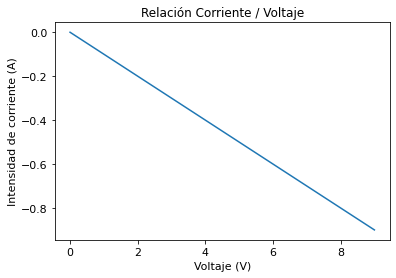

In [12]:
figura = plt.figure()
plt.title('Relación Corriente / Voltaje')
ejeX = resultados['dc']['V1']
ejeY = resultados['dc']['I(V1)']

plt.xlabel('Voltaje (V)')
plt.ylabel('Intensidad de corriente (A)')
plt.plot(ejeX, ejeY, label="Voltaje (V1)")

> **Pregunta:** comenta la gráfica anterior… ¿qué estamos viendo exactamente? Etiqueta los ejes de la misma convenientemente. Así como ningún número puede *viajar* solo sin hacer referencia a su naturaleza, ninguna gráfica puede estar sin sus ejes convenientemente etiquetados. Algo de [ayuda](https://matplotlib.org/3.1.0/gallery/pyplots/fig_axes_labels_simple.html). ¿Qué biblioteca estamos usando para graficar? Una [pista](https://matplotlib.org).


La gráfica anterior muestra la relación entre la intensidad de corriente (A) y el voltaje (V1) del circuito. Es una relación lineal, consecuente con la aplicación de la ley de Ohm que relaciona voltaje, intensidad de corriente, y resistencia.

Para graficar el resultado del análisis .dc anterior hemos utilizado Matplotlib:

Matploblib es una exhaustiva librería para crear visualizaciones estáticas y animadas utilizando Python. 

 ### Resultados de la simulación `.op` 
 El método `.results` nos devuelve un diccionario con los resultados de la simulación.

In [13]:
print(resultados['op'].results)

{V1: -9.0, I(V1): -0.9}


 > **Pregunta:** justifica el sencillo resultado anterior (análisis `op`). Repite el cálculo con Sympy, atendiendo con mimo a las unidades y al formateo de los resultados (tal y como hemos visto en muchos otros notebooks en clase).

 El análisis .op anterior nos muestra un diccionario con dos resultados. En primer lugar, obtenemos el voltaje aplicado en el circuito, y, en segundo lugar, la intensidad de corriente que circula en la rama principal del circuito. Debido a que es un circuito sencillo, con una única pila y una única rama, el análisis .op no hace sino constatar la relación voltaje/intensidad que determina la ley de Ohm.

 Esto es, 

 La pila de 9V produce una diferencia de potencial entre sus bornes que "excita" el movimiento uniforme de electrones en el conductor (cable), que comienzan a moverse recorriendo el circuito entre ambos bornes y producen una corriente eléctrica de intensidad 0.9 A, atenuada por el efecto de la resistencia dispuesta en dicho circuito.

## Resolución del mismo circuito pero con LTspice
¿Cómo? ¿Es esto posible? ¿Desde Jupyter? Sí!!! Pero primero, por comodidad, deberíamos crear un alias del comando que apunte a nuestro ejecutable. Además, con un poco de inteligencia, podemos adelantarnos al hecho de si estamos en Windows o macOS:

In [8]:
import platform
%alias lts /Applications/LTspice.app/Contents/MacOS/LTspice -ascii -b
if platform.system() == "Windows":
    %alias lts "C:\Program Files\LTC\LTspiceXVII\XVIIx64.exe" -ascii -b

**Pregunta**: ¿Qué significan las opciones `-b` y `-ascii`? Algo de ayuda [aquí](http://ltwiki.org/LTspiceHelp/LTspiceHelp/Command_Line_Switches.htm).

El modificador -ascii permite utilizar los archivos de extensión raw con valores decimales. Por defecto, sin utilizar esta opción, el fichero de resultados raw que proporciona LTSPice está en binario.

Por su parte, el modificador -b ejecuta el análisis del circuito en segundo plano, sobre el fichero raw.

También tenemos que cambiar ligeramente la sintaxis. Ejecuta esta línea para que se escriba el fichero siguiente. Para LTspice, vamos a reservar la extensión `.net`:

In [23]:
%%writefile "circuito sencilloooooo.net"
* Este es un circuito sencillo adaptado para LTspice
r1 1 0 100
v1 0 1 9
.op
* Comentamos el análisis .dc para centrarnos primero en el .op
* .dc v1 1 10 
.end

Overwriting circuito sencilloooooo.net


Ejecutamos LTspice con el circuito (de la misma manera que antes habíamos hecho con Ahkab).

In [24]:
lts "circuito sencilloooooo.net"

Veamos el contenido de la simulación.

In [25]:
%pycat circuito sencilloooooo.log

Ahora repitamos lo mismo para el análisis `.dc`:

In [26]:
%%writefile "circuito sencilloooooo.net"
* Este es un circuito sencillo adaptado para LTspice
r1 1 0 100
v1 0 1 9
* Ahora obviamos el análisis .op
* .op
.dc v1 1 10 
.end


Overwriting circuito sencilloooooo.net


In [27]:
lts "circuito sencilloooooo.net"

Al ejecutar esta simulación, se genera un fichero `.raw` con los resultados. Es muy parecido al `outfile` que hemos empleado antes con Ahkab. Para leer este fichero, tenemos que usar el paquete [ltspice de Python](https://github.com/DongHoonPark/ltspice_pytool), el cual podéis instalar directamente desde Jupyter:

In [9]:
!pip install ltspice

Ahora ya podemos leer este fichero `.raw` y pintar una recta de voltaje muy parecida a la que obtuvimos anteriormente con Ahkab:

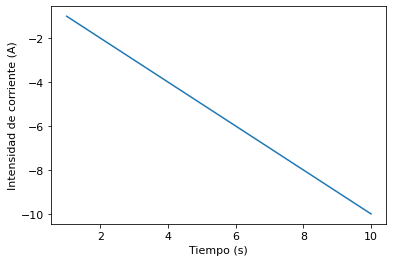

In [29]:
import ltspice
l = ltspice.Ltspice("circuito sencilloooooo.raw")
l.parse()
tiempo = l.get_time()
voltaje = l.get_data('V(1)')
corriente = l.get_data('I(V1)')
# Podemos pintar la corrente en función del tiempo
# plt.plot(tiempo, corriente)
# O el voltaje
plt.xlabel('Tiempo (s)')
plt.ylabel('Intensidad de corriente (A)')
plt.plot(tiempo, voltaje)

** En resumen: ** hemos usado dos *compiladores* Spice distintos para hacer el mismo ejercicio. De igual manera podríamos haber usado [Ngspice](http://ngspice.sourceforge.net) u otro. De hecho, podíamos haber usado Ahkab en modo comando. Si tenemos correctamente instalado este framework, en princpio podemos invocarlo [directamente desde línea de comandos](https://ahkab.readthedocs.io/en/latest/help/Command-Line-Help.html):

In [14]:
!ahkab "circuito sencillo.sp"

2020-12-28 18:54:10
ahkab v. 0.18 (c) 2006-2015 Giuseppe Venturini

Operating Point (OP) analysis

Netlist: circuito sencillo.sp
Title: * este es un circuito sencillo
At 300.00 K
Options:
	vea = 1.000000e-06
	ver = 0.001000
	iea = 1.000000e-09
	ier = 0.001000
	gmin = 0.000000e+00

Convergence reached in 2 iterations.

RESULTS:

Variable    Units      Value        Error    %
----------  -------  -------  -----------  ---
V1          V           -9    9.00002e-12    0
I(V1)       A           -0.9  0              0

ELEMENTS OP INFORMATION:

Part ID      R [Ω]    V(n1,n2) [V]    I(n1->n2) [A]    P [W]
---------  -------  --------------  ---------------  -------
R1              10              -9             -0.9      8.1

Part ID      V(n1,n2) [V]    I(n1->n2) [A]    P [W]
---------  --------------  ---------------  -------
V1                      9             -0.9     -8.1

Total power dissipation: 8.1 W

#V1	V1	I(V1)
0.000000000000000000e+00	0.000000000000000000e+00	0.00000000000000000

**Ejercicio premium**: Graficar los datos anteriores con [Gnuplot](http://www.gnuplot.info). 

### Intento de uso de Gnuplot desde un Notebook de Jupyter
Hemos intentado usar la biblioteca [gnuplot-kernel](https://github.com/has2k1/gnuplot_kernel), que permite usar Gnuplot desde un Notebook de Jupyter, pero no lo hemos conseguido.

Los pasos para instalarla son:
```
!pip install gnuplot_kernel
%load_ext gnuplot_kernel
```

Finalmente, decidimos usar Gnuplot desde la terminal.

#### Generar un fichero de corrdenadas para cargarlo en Gnuplot

In [15]:
contador = 0

handler = open('datos.dat', 'w')

for i in resultados['dc']['V1']:
    linea = str(i) + '\t' + str(resultados['dc']['I(V1)'][contador]) + '\n'
    contador += 1
    
    handler.write(linea)

handler.close()

[Aquí](https://gist.githubusercontent.com/Dynam1co/75877a407a5f07d237db270fd6cd621f/raw/97c144583d576076a5b004ef3680be258794f321/datos.dat) podemos ver el fichero generado.

### Script Gnuplot para generar un png con la gráfica
Este script, al que hemos llamado **script.gnu**, nos permite configurar la visualización del gráfico:

```
cd "/home/fjasensi/Dropbox/Grado ingeniería informática/Fundamentos físicos de la informática/Actividad 2"
reset
set grid
set title 'Relación Corriente / Voltaje'
set xlabel 'Voltaje (V)'
set ylabel 'Intensidad de corriente (A)'
set terminal postscript
set output "datos.png"
set style line 1 lc rgb '#0060ad' lt 1 lw 2 pi -1 ps 1.0
set lmargin 10
set rmargin 10
set style data lines
#set termoption dashed
set terminal pngcairo dashed
plot "datos.dat"
pause mouse
```

[Aquí](https://gist.githubusercontent.com/Dynam1co/d8623e5be6e4eee70f4d67f8720636f7/raw/70b2e9bf8e1f26cca89f6884a48511b955397387/script.gnu) tenemos el script original.

Ahora, desde la terminal ejecutamos:
```
gnuplot
```

Ahora estaremos en la consola de Gnuplot, para ejecutar el script tecleamos:
```
call system('gnuplot script.gnu')
```

En la ruta que hemos especificado en el script, veremos el png con el siguiente gráfico:
![Grafico_gnuplot](https://gist.githubusercontent.com/Dynam1co/d3382d825fa3f8c459f9ccada603ed45/raw/8746c02f19bea408a5e1d2631090ab94b88a1dd2/datos.png)

 ## Análisis de circuito con resistencias en serie

Vamos a resolver (en punto de operación) el siguiente circuito:

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/resistencias%20en%20serie.svg?sanitize=true)

Al igual que antes, grabamos el netlist en disco desde Jupyter gracias a la *palabra mágica* [`%writefile`](https://ipython.readthedocs.io/en/stable/interactive/magics.html#cellmagic-writefile). Más info [aquí](https://ipython.readthedocs.io/en/stable/interactive/magics.html#cellmagic-writefile). 

In [ ]:
%%writefile "resistencias en serie.net"
* circuito con tres resistencias en serie
v1 1 0 type=vdc vdc=9
R1 0 2 3k
R2 2 3 10k  
R3 3 1 5k
* análisis del circuito
.op
.end

In [ ]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en serie.net')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

Imprimimos los resultados del análisis `.op`:

In [ ]:
print(resultados['op'])

Los cantidades `V1`, `V2` y `V3` hacen referencia a los distintos valores del potencial que se ha perdido en cada uno de los bornes que has elegido para describir el netlist (`1`, `2`, etc.). Por ejemplo, podemos calcular el *potencial consumido* por la resistencia `R1` y verás que coincide con el del punto `V2` devuelto por Ahkab. **Ejercicio**: compruébalo tú mismo y refléjalo por escrito.

Vamos a realizar la comprobación utilizando Sympy. 

Como premisa, tenemos en cuenta que se trata de un circuito sencillo con una única malla y resistencias en serie, con lo que tenemos un único valor de intensidad de corriente que circula por toda la malla,y que Ahkab convenientemente nos ha dado y ha etiquetado como I(V1). En el análisis de resultados, ese identificador I(V1) significa que Ahkab devuelve los valores de intensidad de corriente asociados al potencia de una batería presente en el circuito. En este circuito sencillo sólo tenemos una única batería identificada como V1.


In [ ]:
#Unidades fundamentales
from sympy.physics.units import kilo
from sympy.physics.units import volts
from sympy.physics.units import ohms
from sympy.physics.units import amperes

#Conversión de unidades, solución ecuaciones y carga de símbolos
from sympy.physics.units import convert_to
from sympy import solve, symbols, Eq

#Valores conocidos (intensidad de corriente y resistencia R1 del circuito)
intensidad = resultados['op']['I(V1)'][0][0]*amperes
R1 = 3*kilo*ohms

#Valor a despejar: voltaje consumido por la resistencia R1
voltaje = symbols('v2')

ley_ohm = Eq(voltaje, intensidad*R1)

solucion_para_voltaje_v2 = solve(ley_ohm, voltaje)
print('El potencial consumido por la resistencia R1 es ' + str(convert_to(solucion_para_voltaje_v2[0], [volts]).n(2)) + '. Coincide con el valor V2 devuelto por Ahkab.')

 > **Pregunta**: reproduce el resto de los valores anteriores de manera *manual* mediante Sympy (es decir, aplicando la ley de Ohm, pero con un *toque computacional*). Te pongo aquí un ejemplo del que puedes partir… En él sólo calculo la corriente que circula por el circuito (sí, justo la que antes Ahkab ha devuelto de manera automática). Para ello necesito previamente computar la resistencia total (`r_total`). Faltarían el resto de resultados y convertirlos a unidades más *vistosas* (mediante la orden `convert_to` y `.n()`).

En primer lugar, vamos a calcular el valor de la resistencia equivalente del circuito. Adelantamos que es un valor muy sencillo, puesto que se trata de la suma arimética de todas las resistencias en serie. Posteriormente, con dicho valor como premisa, vamos a obtener el valor de la intensidad total que circula por la malla, y los diferentes valores de potencial eléctrico en los bornes de cada resistencia.



In [ ]:
#Unidades fundamentales
from sympy.physics.units import kilo
from sympy.physics.units import volts
from sympy.physics.units import ohms
from sympy.physics.units import amperes

#Conversión de unidades, solución ecuaciones y carga de símbolos
from sympy.physics.units import convert_to
from sympy import solve, symbols, Eq

#Valores conocidos (voltaje de la batería V1 e intensidad de la corriente I(V1)
v1 = resultados['op']['V1'][0][0]*volts
intensidad = resultados['op']['I(V1)'][0][0]*amperes

#Valor a despejar: resistencia total equivalente del circuito
resistencia = symbols('r')

ley_ohm = Eq(v1, intensidad*resistencia)
solucion_para_resistencia = solve(ley_ohm, resistencia)
print('La resistencia equivalente del circuito es ' + str(convert_to(solucion_para_resistencia[0], [ohms]).n(2)) + '. Se puede comprobar que coincide con la suma aritmética de R1+R2+R3')


#Calculamos ahora el voltaje V3. Se corresponde al voltaje que circula por las resistencias R1 y R2 sumadas.
#Valores conocidos (resistencia R3 e intensidad de corriente)
r1 = 3*kilo*ohms
r2 = 10*kilo*ohms
resistencia_equivalente = r1+r2
intensidad = resultados['op']['I(V1)'][0][0]*amperes

#Valor a despejar: voltaje v3
v3 = symbols('v')

ley_ohm = Eq(v3, intensidad*resistencia_equivalente)
solucion_para_voltajev3 = solve(ley_ohm, v3)
print('El voltaje V3 es ' + str(convert_to(solucion_para_voltajev3[0], [volts]).n(2)) )



> **Pregunta**: Demuestra que se cumple la Ley de Kirchhoff de la energía en un circuito, es decir, que la suma de la energía suministrada por las fuentes (pilas) es igual a la consumida por las resistencias. Realiza la operación con Sympy.

$$
\sum_i^N V_{\text{fuentes}} = \sum_j^M V_{\text{consumido en resistencias}}
$$

Ten en cuenta que en este caso sólo hay una fuente.


En este circuito sencillo, con una única fuente de voltaje y tres resistencias en serie, vamos a comprobar la ley de Kirchoff de la energía. Para ello, vamos a calcular el voltaje que circula por cada una de las resistencias. Comenzaremos el cálculo por el voltaje en la resistencia R1. Como se trata de un circuito con una única malla, tenemos un único valor de intensidad de corriente que recorre todo el circuito, que vamos a utilizar como dato conocido. 

In [ ]:
#Unidades fundamentales
from sympy.physics.units import kilo
from sympy.physics.units import volts
from sympy.physics.units import ohms
from sympy.physics.units import amperes

#Conversión de unidades, solución ecuaciones y carga de símbolos
from sympy.physics.units import convert_to
from sympy import solve, symbols, Eq

## CALCULO 1: VOLTAJE EN LOS BORNES DE LA RESISTENCIA R1 ##
#Valores conocidos (intensidad de la corriente I(V1) y valor de la resistencia R1)
intensidad = resultados['op']['I(V1)'][0][0]*amperes
r1 = 3*kilo*ohms

#Valores a despejar (voltaje en el borne de la resistencia R1)
v_r1 = symbols('v')
ley_ohm_v_r1 = Eq(v_r1, intensidad*r1)

## CALCULO 2: VOLTAJE EN LOS BORNES DE LA RESISTENCIA R2 ##
#Valores conocidos (intensidad de la corriente I(V1) y valor de la resistencia R1)
intensidad = resultados['op']['I(V1)'][0][0]*amperes
r2 = 10*kilo*ohms

#Valores a despejar (voltaje en el borne de la resistencia R1)
v_r2 = symbols('v')
ley_ohm_v_r2 = Eq(v_r1, intensidad*r2)

## CALCULO 3: VOLTAJE EN LOS BORNES DE LA RESISTENCIA R3 ##
#Valores conocidos (intensidad de la corriente I(V1) y valor de la resistencia R1)
intensidad = resultados['op']['I(V1)'][0][0]*amperes
r3 = 5*kilo*ohms

#Valores a despejar (voltaje en el borne de la resistencia R1)
v_r3 = symbols('v')
ley_ohm_v_r3 = Eq(v_r3, intensidad*r3)


print('El voltaje en los bornes de la resistencia R1 es ' + str( convert_to(solve(ley_ohm_v_r1, v_r1)[0], [volts]).n(2)))
print('El voltaje en los bornes de la resistencia R2 es ' + str( convert_to(solve(ley_ohm_v_r2, v_r2)[0], [volts]).n(2)))
print('El voltaje en los bornes de la resistencia R3 es ' + str( convert_to(solve(ley_ohm_v_r3, v_r3)[0], [volts]).n(2)))

print('La suma aritmética de los voltajes en los bornes de las tres resistencias equivale al voltaje total suministrado por la batería (9 V). Se demuestra por tanto la ley de Kirchoff ')


## Análisis `.op` de circuitos con resistencias en paralelo

Vamos a complicar un poco el trabajo añadiendo elementos en paralelo.

 > **Pregunta**: realiza los análisis `.op` de los siguientes circuitos.
 Para ello crea un netlist separado para cada uno donde queden correctamente descritos
 junto con la simulación (`.op`). Comenta los resultados que devuelve Ahkab (no imprimas los resultados de las simulaciones *sin más*).

 ![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/resistencias%20en%20paralelo.svg?sanitize=true)

 Aquí tienes el análisis del primer circuito, para que sirva de ejemplo:

In [ ]:
%%writefile "resistencias en paralelo 1.cir"
* resistencias en paralelo
vdd 0 1 vdc=12 type=vdc
r2 1 2 1k
r3 2 3 220
r4 3 0 1.5k
r5 2 0 470
.op
.end

In [ ]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 1.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

Imprimimos los resultados del análisis `.op`. Como puedes comprobar, Ahkab sólo reporta la intensidad de corriente en las ramas en las que hay una pila (en este caso, la rama donde está la pila `VDD`).

In [ ]:
print(resultados['op'])

> **Pregunta:** inserta dos *pilas virtuales* de 0 voltios en el resto de ramas del circuito (`Vdummy1` en la rama donde está `R5` y `Vdummy2` en la rama donde está `R3` y `R4`) para que Ahkab nos imprima también la corriente en las mismas. Es muy parecido al tercer circuito que tienes que resolver, donde `V1`, `V2` y `V3` tienen cero voltios. Estas *pilas nulas* son, a todos los efectos, *simples cables*. Una vez que ya tienes las corrientes en todas las ramas, comprueba que se cumple la Ley de Kirchhoff para las corrientes:

$$
I_{\text{entrante}} = \sum_i^{N} I_{\text{salientes}}
$$

Repite lo mismo para los otros dos circuitos. Realiza además los cálculos con Sympy (recalcula los mismos voltajes que devuelve Ahkab a partir de la corriente que sí te devuelve la simulación) y cuidando de no olvidar las unidades. Recuerda que el objeto `resultados` alberga toda la información que necesitas de manera indexada. Ya han aparecido un ejemplo más arriba. Es decir: no *copies* los números *a mano*, trabaja de manera informáticamente elegante (usando la variable `resultados`). 

### Comprobación de la ley de Kirchoff para las corrientes

Vamos a demostrar la ley de Kirchoff para las corrientes, matemáticamente expresada más arriba, utilizando para ello dos voltajes nulos que colocaremos convienentemente en el circuito. A continuación, se muestra el diagrama del circuito con los dos voltajes nulos.

![Circuito resistencias en paralelo](https://i.ibb.co/W5mxYv1/circuito-1-resistencias-paralelo.png)


Mediante el módulo Akhab, y el uso de los voltajes nulos para que nos permita obtener las distintas intensidades de corriente por las mallas, tenemos todo lo necesario para la demostración de la ley de Kirchoff para las corrientes mediante un análisis .op.


In [ ]:
%%writefile "circuito_1_voltajes_nulos.cir"
* Circuito 1 con resistencias serie y paralelo y voltajes nulos para test de corrientes
v1 0 1 vdc=12 type=vdc
v2 0 5 vdc=0 type=vdc
v3 0 4 vdc=0 type=vdc
r1 1 2 1k
r2 2 5 470
r3 2 3 220
r4 3 4 1.5k
.op
.end

In [ ]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('circuito_1_voltajes_nulos.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

In [ ]:
print(resultados['op'])

Podemos interpretar este análisis .op en el que vemos que, efectivamente, se cumple la ley de Kirchoff de las corrientes, dado que las corrientes que circulan por los bornes de las baterías de voltajes nulos, sumadas aritméticamente, nos dan como resultado la intensidad que circula por la rama de la batería de 9 V, es decir, I(V1)


A continuación, vamos a realizar el análisis .op y su interpretación con el segundo circuito, que vamos a mostrar en la siguiente imagen:

![Circuito resistencias y voltajes en paralelo](https://i.ibb.co/7bzNG4X/circuito-2-resistencias-voltajes-paralelo.png)


Incluimos en la rama de la resistencia R5 una batería con voltaje nulo para que Ahkab pueda mostrarnos el valor de corriente en dicha malla en el análisis .op




In [ ]:
%%writefile "circuito_2_voltajes_resistencias_paralelo.cir"
* Circuito 2 con resistencias serie y paralelo y voltaje adicional
v1 0 1 vdc=9 type=vdc
v2 0 5 vdc=1.5 type=vdc
v3 0 6 vdc=0 type=vdc
r1 1 2 47
r2 2 3 220
r3 2 5 180
r4 3 4 1k
r5 4 6 560
.op
.end

In [ ]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('circuito_2_voltajes_resistencias_paralelo.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

In [ ]:
print(resultados['op'])

### Resolución por método de mallas
Vamos a hacer el análisis de este circuito por el método de mallas, basado en la ley de tensiones de Kirchhoff usando SymPy.

En la imagen del circuito podemos ver la dirección de las corrientes en las dos mallas:
![Circuit_2](https://gist.githubusercontent.com/Dynam1co/63b3a6fb8cd56fbe4485b05889364dc8/raw/dc3fe4a1811fa2bbabcad231a4aa922ad84987a3/circuit.svg)

In [ ]:
from sympy.physics.units import ohms, amperes, volts, kilo, watts
from sympy.physics.units import convert_to
from sympy import solve, symbols, Eq

# Pilas
v1 = 9*volts
v2 = 1.5*volts

# Resistencias
r1 = 47*ohms
r2 = 220*ohms
r3 = 180*ohms
r4 = 1*kilo*ohms
r5 = 560*ohms

# Variables
i1, i2 = symbols('I1 I2')

# Plantear sistema de ecuaciones según la segnda ley de Kirchhoff
ecuaciones = [
    Eq(-v1 + r1 * i1 + r3 * (i1 - i2) + v2, 0),
    Eq(-v2 + r3 * (i2 - i1) + r2 * i2 + r4 * i2 + r5 * i2, 0),
]

res_intensidades = solve(ecuaciones)

intensidad_1 = convert_to(res_intensidades[i1], [amperes])
intensidad_2 = convert_to(res_intensidades[i2], [amperes])

# Obtenemos I3 usando la primera ley de Kirchhoff
intensidad_3 = intensidad_1 + intensidad_2

txt_result = """
        Las intensidades calculadas son las siguientes:\n
        I1 = {0}
        I2 = {1}
        I3 = {2}
    """

print(txt_result.format(intensidad_1, intensidad_2, intensidad_3))

Comprobamos que las intensidades calculadas con SymPy dan el mismo resultado que las calculadas con Ahkab.

### Demostración de la ley de Kirchoff para las corrientes con el circuito 3

El circuito sobre el que vamos a demostrar la ley de Kirchoff para las corrientes es el siguiente:

![Circuito voltajes en paralelo](https://i.ibb.co/4p8T71f/circuito-3-voltajes-paralelo.png)

Para realizar la demostración, vamos a partir del análisis .op que efectuará Akhab sobre el script del circuito. Lo presentamos a continuación:


In [ ]:
%%writefile "circuito_3_voltajes_paralelo.cir"
* Circuito 1 con resistencias serie y paralelo y voltajes nulos para test de corrientes
v 0 1 vdc=9 type=vdc
v1 1 2 vdc=0 type=vdc
v2 1 3 vdc=0 type=vdc
v3 1 4 vdc=0 type=vdc
r1 2 0 10k
r2 3 0 2k
r3 4 0 1k
.op
.end

In [ ]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('circuito_3_voltajes_paralelo.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)


In [ ]:
print(resultados['op'])

¿Qué podemos inferir en el análisis .op de este circuito? En primer lugar, tenemos que el voltaje V2, V3, y V4 se corresponde al voltaje en paralelo de la única batería que nos proporciona 9 voltios de potencial eléctrico.

Por otro lado:

$$
I(V) = I(V1) + I(V2) + I(V3)
$$

La Ley de Kirchoff de las corrientes nos dice que, en cualquier nodo,  la suma de la corriente que entra en ese nodo es igual a la suma de la corriente que sale. De igual forma, La suma algebraica de todas las corrientes que pasan por el nodo es igual a cero.

Vemos que el análisis .op nos da este resultado puesto que la suma algebraica de las corrientes que van por los nodos V1,V2,V3 es igual a la corriente total del circuito, que podemos calcular a partir de la ley de Ohm, teniendo en cuenta, que el valor de la resistencia total de este circuito se corresponde con la siguiente fórmula (al ser resistencias colocada sen paralelo a la fuente de voltaje)

$$
\frac{1}{R_T} = \frac{1}{R_1} \ + \ \frac{1}{R_2} \ + \frac{1}{R_3}
$$

Realizamos en la siguiente celda el cálculo mediante Sympy:



In [ ]:
#Unidades fundamentales
from sympy.physics.units import kilo
from sympy.physics.units import volts
from sympy.physics.units import ohms
from sympy.physics.units import amperes

#Conversión de unidades, solución ecuaciones y carga de símbolos
from sympy.physics.units import convert_to
from sympy import solve, symbols, Eq

## CALCULO 1: VOLTAJE EN LOS BORNES DE LA RESISTENCIA R1 ##
#Valores conocidos (voltajes y resistencias)
R1 = 10*kilo*ohms
R2 = 2*kilo*ohms
R3 = 1*kilo*ohms
V2 = resultados['op']['V2'][0][0]*volts
V3 = resultados['op']['V3'][0][0]*volts
V4 = resultados['op']['V4'][0][0]*volts

#Valores a despejar (intensidades en todos los nodos)
I_V1 = symbols('I')
I_V2 = symbols('I')
I_V3 = symbols('I')

#Ley de Ohm para cada una de los nodos
ley_ohm_iv1 = Eq(V2, I_V1*R1)
ley_ohm_iv2 = Eq(V3, I_V2*R2)
ley_ohm_iv3 = Eq(V4, I_V3*R3)


print('La intensidad en la rama de V2 es ' + str( convert_to(solve(ley_ohm_iv1, I_V1)[0], [amperes]).n(2)))
print('La intensidad en la rama de V3 es ' + str( convert_to(solve(ley_ohm_iv2, I_V2)[0], [amperes]).n(2)))
print('La intensidad en la rama de V4 es ' + str( convert_to(solve(ley_ohm_iv3, I_V3)[0], [amperes]).n(2)))
print('La suma aritmética de las tres intensidades anteriores equivale al valor I(V) proporcionado en el análisis .op. Se demuestra por tanto la ley de Kirchoff ')



 # Circuitos en DC que evolucionan con el tiempo

 ## Carga de un condensador
 Vamos a ver qué le pasa a un circuito de corriente continua cuando tiene un condensador
 en serie.

 ![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/condensador%20en%20continua.svg?sanitize=true)

 Al igual que antes, primero guardamos el circuito en un netlist externo:

In [ ]:
%%writefile "condensador en continua.ckt"
* Carga condensador
v1 0 1 type=vdc vdc=6
r1 1 2 1k
c1 2 0 1m ic=0
.op
.tran tstep=0.1 tstop=8 uic=0
.end

> **Pregunta:** ¿qué significa el parámetro `ic=0`? ¿qué perseguimos con un análisis de tipo `.tran`?

El parámetro ic representa la condición de carga inicial del condensador, esto es, un voltaje inicial del condesador. Es un parámetro opcional en la definición del condensador en el circuito.

Leamos el circuito:

In [ ]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit("condensador en continua.ckt")

 Separamos el netlist de los análisis y asignamos un fichero de almacenamiento de datos (`outfile`):

In [ ]:
circuito = circuito_y_análisis[0]
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
lista_de_análisis[1]['outfile'] = "simulación tran.tsv"

 Ejecutamos la simulación:

In [ ]:
resultados = ahkab.run(circuito, lista_de_análisis)
print(resultados['op'])
#print(resultados['tran'].keys())
print(resultados['tran'])

 Dibujamos la gráfica de carga del condensador con el tiempo, centrándonos en la intensidad que circula por la pila. 

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
figura = plt.figure()

%matplotlib inline
set_matplotlib_formats('svg')

plt.title("Carga de un condensador")
plt.xlabel('Tiempo (s)')
plt.ylabel('Intensidad de corriente (A)')


plt.plot(resultados['tran']['T'], resultados['tran']['I(V1)'])

> **Pregunta:** Etiqueta los ejes convenientemente y comenta la gráfica. Dibuja otra gráfica con el voltaje en el borne `V1`. ¿Por qué son *opuestas*? ¿Qué le ocurre al voltaje a medida que evoluciona el circuito en el tiempo? Dibuja las gráficas en un formato estándar de representación vectorial (SVG, por ejemplo). Algo de ayuda [aquí](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.set_matplotlib_formats). ¿Qué valores devuelve el análisis de tipo `.op`? Justifícalo.

Partimos del hecho de que un condensador en un circuito almacena carga, lo cual realiza a medida que pasa el tiempo. En este caso, hemos determinado en el instante inicial que el condensador no tiene carga (ic=0). A medida que el condensador almacena carga, la intensidad de corriente decrece. ¿Hasta cuándo? Cuando el condensador de haya cargado completamente, deja de circular corriente en el circuito.

La siguiente gráfica nos muestra la relación entre el tiempo de carga y el voltaje V1. El voltaje permanece inalterable mientras el condensador se carga en el tiempo



In [ ]:
figura = plt.figure()
plt.title("Carga de un condensador")
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje V1 (V)')

plt.plot(resultados['tran']['T'], resultados['tran']['V1'])


## Carrera de condensadores

Ahora tenemos un circuito con dos condensadores en paralelo: 

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/condensadores%20en%20paralelo.svg?sanitize=true)

> **Pregunta:** Crea el netlist de este circuito e identifica qué condensador se satura primero. Dibuja la evolución de la intensidad en ambas ramas de manera simultánea. [Aquí](https://matplotlib.org/gallery/api/two_scales.html) tienes un ejemplo de cómo se hace esto en Matplotlib. Recuerda que para que Ahkab nos devuelva la corriente en una rama, debe de estar presente una pila. Si es necesario, inserta pilas virtuales de valor nulo (cero voltios), tal y como hemos comentado antes. Grafica también los voltajes (en otra gráfica, pero que aparezcan juntos). 

In [3]:
%%writefile "carrera en condensadores.ckt"
* Carga condensador
v0 0 1 type=vdc vdc=10
r1 0 2 3k
c1 2 3 47u ic=0
v1dummy 3 1 type=vdc vdc=0
c2 2 4 22u ic=0
v2dummy 4 1 type=vdc vdc=0
.tran tstep=0.01 tstart=6.5 tstop=7.5 uic=0
.end

Writing carrera en condensadores.ckt


In [4]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit("carrera en condensadores.ckt")
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
lista_de_análisis[0]['outfile'] = "simulación tran carrera condensadores.tsv"
resultados = ahkab.run(circuito, lista_de_análisis)

print(resultados['tran'].keys())

Starting transient analysis: 
Selected method: TRAP
Solving...  done.
Average time step: 0.00900901
['T', 'V1', 'V2', 'V3', 'V4', 'I(V0)', 'I(V1DUMMY)', 'I(V2DUMMY)']



Analizando la gráfica que nos muestra matplotlib, vemos la intensidad en el condensador C2 "tiende" a cero de manera más rápida que el condensador C1: se puede ver, para un mismo intervalo de tiempo, por ejemplo entre 7.2 y 7.4 segundos, que el condensador C2 tiene mayor pérdida progresiva de corriente eléctrica, con lo que el punto de saturación total de C2 se alcanzará antes. Recordemos que la saturación del condensador (cuando éste llega a su punto máximo de carga) va a hacer que la corriente eléctrica que circula por el circuito se detenga.


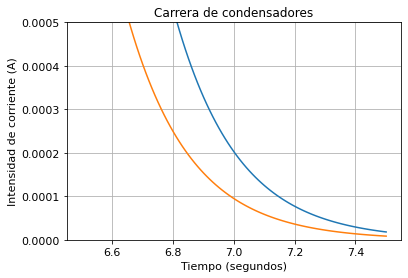

In [6]:
figura = plt.figure()
plt.title("Carrera de condensadores")
#Ajustamos los límites de los ejes para visualizar mejor la gráfica
#plt.xlim(6.65, 7.5)
plt.ylim(0.0, 0.0005)
plt.grid()
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Intensidad de corriente (A)')
plt.plot(resultados['tran']['T'], resultados['tran']['I(V1DUMMY)'],label="Intensidad en C1")
plt.plot(resultados['tran']['T'], resultados['tran']['I(V2DUMMY)'],label="Intensidad en C2")

En la siguiente gráfica, se muestra el voltaje en función del tiempo:

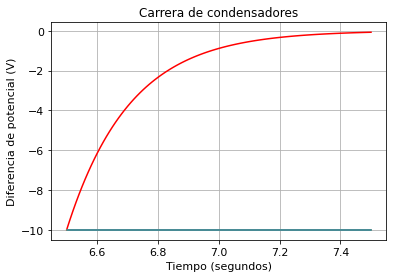

In [15]:
figura = plt.figure()
plt.title("Carrera de condensadores")
plt.grid()
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Diferencia de potencial (V)')
plt.plot(resultados['tran']['T'], resultados['tran']['V1'],color="blue")
plt.plot(resultados['tran']['T'], resultados['tran']['V2'],color="red")
plt.plot(resultados['tran']['T'], resultados['tran']['V3'],color="yellow")
plt.plot(resultados['tran']['T'], resultados['tran']['V4'],label="green")

En la gráfica que estamos viendo con respecto a la diferencia de potencial, se puede ver el efecto del potencial que el condensador va adquiriendo a medida que acumula carga eléctrica en sus placas. Pasamos de un potencial negativo a un potencial 0 a lo largo del tiempo mientras se produce la saturación del condensador. 

Ambas gráficas validan el funcionamiento general de los condensadores en un circuito eléctrico: acumulan carga entre sus placas hasta que, una vez cargados, deja de fluir corriente eléctrica en el circuito.

**Ejercicio premium:** Repite la simulación con LTspice (invocándolo como comando externo, leyendo los datos de un fichero `.raw` y volviendo a graficar con Matplotlib. 

A continuación establecemos el netlist para LTSpice.


In [9]:
%%writefile "carrera en condensadores lt.net"
* Carga condensador LTspice
v0 0 1 10
r1 0 2 3k
c1 2 3 47u 
v1dummy 3 1 0
c2 2 4 22u 
v2dummy 4 1 0
.tran 7.5s 6.5s 0.01s UIC
.end

Writing carrera en condensadores lt.net


In [10]:
lts "carrera en condensadores lt.net"

In [11]:
import ltspice
l = ltspice.Ltspice("carrera en condensadores lt.raw")
l.parse()

In [259]:
print(l.get_time())

[0.00000000e+00 7.32421875e-04 2.19726562e-03 ... 7.48168945e+00
 7.48901367e+00 7.49000000e+00]


Mostramos el voltaje en función del tiempo:

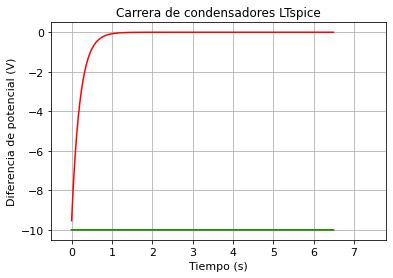

In [12]:
plt.title("Carrera de condensadores LTspice")
plt.xlabel('Tiempo (s)')
plt.ylabel('Diferencia de potencial (V)')
plt.xlim((-0.5, 7.8))
plt.grid()
plt.plot(l.get_time(), l.get_data('V(1)'),color="blue")
plt.plot(l.get_time(), l.get_data('V(2)'),color="red")
plt.plot(l.get_time(), l.get_data('V(3)'),color="yellow")
plt.plot(l.get_time(), l.get_data('V(4)'),color="green")
plt.show()

Mostramos el voltaje en función del tiempo:

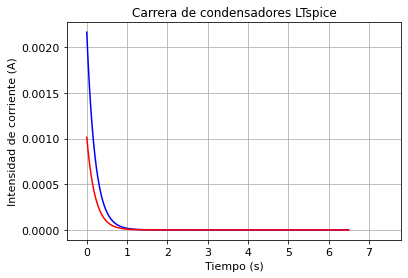

In [13]:
plt.title("Carrera de condensadores LTspice")
plt.xlabel('Tiempo (s)')
plt.ylabel('Intensidad de corriente (A)')
plt.xlim((-0.5, 7.8))
plt.grid()
plt.plot(l.get_time(), l.get_data('I(V1dummy)'),color="blue")
plt.plot(l.get_time(), l.get_data('I(V2dummy)'),color="red")
plt.show()

## Circuitos en corriente alterna

** Ejercicio:** Simula este circuito con LTspice y representa el voltaje y la intensidad en función del tiempo. Traduce este ejercicio a la versión Spice de Akhab y haz la misma representación. Ahkab utiliza otra sintaxis para expresar la corriente alterna. Esta está descrita en la [documentación](https://ahkab.readthedocs.io/en/latest/help/Netlist-Syntax.html#id24). 

In [ ]:
%%writefile "corriente alterna.net"
* Circuito en corriente alterna
v1 1 0 sin(0 120 60 0 0)
r1 0 1 10k
.tran 1
.end

In [ ]:
lts "corriente alterna.net"

In [ ]:
import ltspice
l = ltspice.Ltspice("corriente alterna.raw")
l.parse()
tiempo = l.get_time()
voltaje = l.get_data('V(1)')
# Pintamos el voltaje en función del tiempo
plt.xlim(0, 0.2) #Establecemos un rango en el ejeX para que se aprecie mejor la grafina sinusoidal
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.plot(tiempo, voltaje, color='red')

In [ ]:
import ltspice
l = ltspice.Ltspice("corriente alterna.raw")
l.parse()
tiempo = l.get_time()
corriente = l.get_data('I(V1)')
# Pintamos la corriente en función del tiempo
plt.xlim(0, 0.2) #Establecemos un rango en el ejeX para que se aprecie mejor la grafina sinusoidal
plt.xlabel('Tiempo (s)')
plt.ylabel('Intensidad de corriente (A)')
plt.plot(tiempo, corriente, color='yellow')

A continuación, realizamos el análisis del circuito y el graficado utilizando Akhab. En este caso, vamos a enfocar el circuito desde la perspectiva de la creación de sus elementos y la llamada al análisis utilizando los métodos propios de Ahkab en lugar de parsear un archivo de netlist.

['T', 'VN1', 'VN2', 'I(V1)']


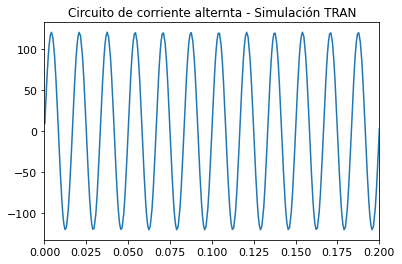

In [113]:
#Importamos los elementos de circuito, la construcción de la función, y la biblioteca matplotlib para el graficado
from ahkab import circuit, time_functions
import pylab as plt

#En el primer paso, definimos nuestro circuito
circuito_corriente_alterna = circuit.Circuit(title="Circuito de corriente alterna")

#Generamos un punto de tierra donde se enganchará la batería de corriente alterna
tierra = mycircuit.get_ground_node()

circuito_corriente_alterna.add_resistor("R1", n1="n1", n2="n2", value=10e3) #Agregamos nuestra resistencia de 10kOhmnios

#A continuación vamos a definir la función periódica de nuestra pila de voltaje, que será una función sinusoidal con:
# amplitud: 120, frecuencia: 60
funcion_voltaje = time_functions.sin(0, 120, 60, 0, 0)

#Añadimos al circuito nuestra fuente de corriente alterna, que tendrá como función sinusoidal la que hemos definido previamente
circuito_corriente_alterna.add_vsource("V1", n1="n1", n2=gnd, dc_value=0, ac_value=1, function=funcion_voltaje)

#Definimos el análisis tran que vamos a ejecutar entre 0 y 2 segundos con un step de 0.5
tran_analysis = ahkab.new_tran(tstart=0, tstop=2, tstep=0.5, x0=None)
resultados = ahkab.run(circuito_corriente_alterna, an_list=[tran_analysis])

#Resultados es un objeto diccionario que contiene todas las claves (magnitudes) de nuestro análisis. Las podemos visualizar.
print(r['tran'].keys())

#Graficamos el voltaje VN1 con respecto al tiempo
plt.title(circuito_corriente_alterna.title + " - Simulación TRAN")
plt.xlim(0, 0.2) #Definimos un rango más adecuado para el eje X de tiempo para visualizar mejor la función sinusoidal del voltaje
plt.plot(r['tran']['T'], r['tran']['VN1'])



# Resumen de lo que se pide
Volved a realizar todos los ejercicios y demos en vuestro propio notebook, explicando con vuestras palabras cada paso, cada gráfica y respondiendo a cada pregunta. Cuidad la belleza, coherencia, narración, explicaciones y gráficas. Todas las gráficas se han pintado con Matplotlib, que es una biblioteca extendidísima en ciencia y tecnología. Es muuuuy bueno que la conozcáis. [Aquí](https://matplotlib.org/tutorials/introductory/pyplot.html) tenéis muchos ejemplos. 